<a href="https://colab.research.google.com/github/MorganGautherot/Machine_Learning_Courses/blob/master/Random_Forest_%26_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multioutput tasks. They are capable of fitting complex datasets.

## Packages importation

In [ ]:
# Importation of the data for our classification example
from sklearn.datasets import load_iris

# Importation of the data for our regression example
from sklearn.datasets import load_boston

# Importation of the decision tree algorithm for regression
from sklearn.tree import DecisionTreeRegressor

# Importation of the decision tree algorithom for classification
from sklearn.tree import DecisionTreeClassifier

# Importation of tree which contain lot of functions for ou decision tree
from sklearn import tree

# import the package graphiz to visualize your trees
import graphviz 

# Importation of the train_test_split function which split randomly our data 
# into a train and test set
from sklearn.model_selection import train_test_split

# Importation of the maplotlib package to create graphics
import matplotlib.pyplot as plt

# Importation of numpy to use of vectors, matrices, tensors.
import numpy as np 

## Classification tree

To understand Decision Trees, let’s just build one and take a look at how it makes predictions.

### Data importation

In [ ]:
# Data frame for our classification example
iris = load_iris()
X_clas = iris.data[:, ]
y_clas = iris.target

X_train_clas, X_test_clas, y_train_clas, y_test_clas = train_test_split(X_clas, 
                                                                        y_clas, 
                                                                        test_size=0.10, 
                                                                        random_state=123)

### Exercice 1 - Initialization

You will intialize your first decision tree model for a classification problem. 

Initialize the learning algorithm so that it creates a tree with the following characteristics: 
- It will have a maximum depth of 3,
- It will have a maximum of 4 leafs,
- It will have for seed the value 123,
- A minimum of 10 examples will be needed to create a leaf.


Don't hesitate to use [sklearn's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), all the answers are there.

In [ ]:
# Initialize your model
decision_tree = DecisionTreeClassifier(max_depth=3, 
                                       max_leaf_nodes=4,
                                       random_state=123,
                                       min_samples_leaf=10)

### Exercice 2 - Training

Now that your algorithm is initialized you can use it to train your model with the train dataset.

Don't hesitate to use [sklearn's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), all the answers are there.

In [ ]:
# Train your model
decision_tree.fit(X_train_clas, y_train_clas)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

### Exercice 3 - Validate your model

Now that your model is training it's time to test its performance on the training and test data set.

Don't hesitate to use [sklearn's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), all the answers are there.

In [ ]:
# Predict the answer for you training dataset
y_pred_train_class = decision_tree.predict(X_train_clas)

# Predict the answer for you testing dataset
y_pred_test_class = decision_tree.predict(X_test_clas)

### Exercie 4 - Visualize your tree

Now that your model is training it's time to visualize your model.

Complete the parameters : 
- feature_names,
- class_names,
- filled, 
- rounded.

Don't hesitate to use [sklearn's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html), all the answers are there.

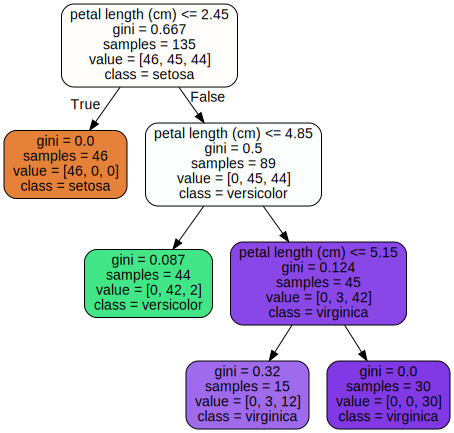

In [ ]:
# Use export_graphiz to export your model in graphviz.
dot_data = tree.export_graphviz(decision_tree,
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,  
                                filled=True, 
                                rounded=True)  

graph = graphviz.Source(dot_data) 

graph

Let’s see how the tree represented in the figure above makes predictions. Suppose you find an iris flower and you want to classify it. You start at the root node (depth 0, at the top): this node asks whether the flower’s petal length is smaller than 2.45 cm. If it is, then you move down to the root’s left child node (depth 1, left). In this case, it is a leaf node (i.e., it does not have any children nodes), so it does not ask any questions: you can simply look at the predicted class for that node and the Decision Tree predicts that your flower is an Iris-Setosa (class=setosa).

Now suppose you find another flower, but this time the petal length is greater than 2.45 cm. You must move down to the root’s right child node (depth 1, right), which is not a leaf node, so it asks another question: is the petal length smaller than 4.85 cm ? If it is, then your flower is most likely an Iris-Versicolor (depth 2, left). If not, it is likely an Iris-Virginica (depth 2, right). It’s really that simple.

### Decision boundary

You can see below how to visualize the decision boundaries of our tree according to the variables.

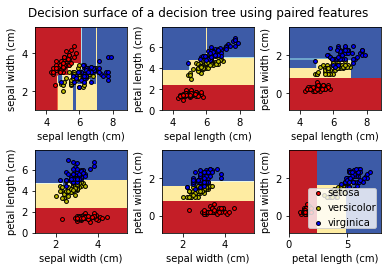

In [ ]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

## Regression tree

### Data importation

In [ ]:
# Data frame for ou regression example
boston = load_boston()
X_reg = boston.data[:, ]
y_reg = boston.target

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, 
                                                                    test_size=0.10, 
                                                                    random_state=123)

### Exercice 1 - Initialization

You will intialize your first decision tree model for a classification problem. 

Initialize the learning algorithm so that it creates a tree with the following characteristics: 
- It will have a maximum depth of 3,
- It will have a maximum of 6 leafs,
- It will have for seed the value 123,
- A minimum of 30 examples will be needed to create a leaf.


Don't hesitate to use [sklearn's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), all the answers are there.

In [ ]:
# Initialize your model
decision_tree_reg = DecisionTreeRegressor(max_depth=3, 
                                         max_leaf_nodes=6,
                                         random_state=123,
                                         min_samples_leaf=30)

### Exercice 2 - Training

Now that your algorithm is initialized you can use it to train your model with the train dataset.


Don't hesitate to use [sklearn's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), all the answers are there.

In [ ]:
# Train your model
decision_tree_reg.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=6,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=30, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')

### Exercice 3 - Validate your model

Now that your model is training it's time to test its performance on the training and test data set.

Don't hesitate to use [sklearn's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), all the answers are there.

In [ ]:
# Predict the answer for you training dataset
y_pred_train_reg = decision_tree_reg.predict(X_train_reg)

# Predict the answer for you testing dataset
y_pred_test_reg = decision_tree_reg.predict(X_test_reg)

### Exercie 4 - Visualize your tree

Now that your model is training it's time to visualize your model.

Complete the parameters : 
- feature_names,
- class_names,
- filled, 
- rounded.

Don't hesitate to use [sklearn's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html), all the answers are there.

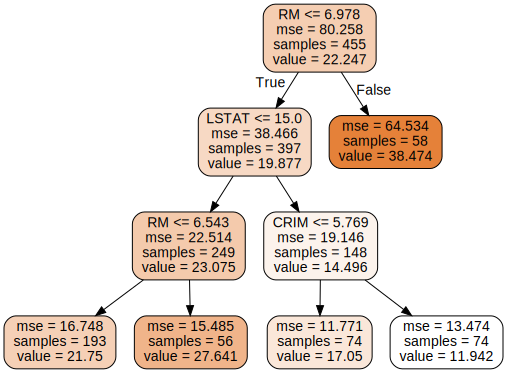

In [ ]:
# Use export_graphiz to export your model in graphviz.
dot_data = tree.export_graphviz(decision_tree_reg,
                                feature_names=boston.feature_names,  
                                class_names="house_price",  f
                                filled=True, 
                                rounded=True)  

graph = graphviz.Source(dot_data) 

graph

Let’s see how the tree represented in the figure above makes predictions. 

Suppose you have an obersation with a RM (average number of rooms per dwelling) of 4. 

In this case, you fall in the first leaf at your right. The prediction will be 38.474.

Suppose you have an obversation with a RM (average number of rooms per dwelling) of 6 and LSTAT (% lower status of the population) of 14.

In this case, you will fall in the first node at your left. After you will answer to the second question about the LSTAT. In our case, 14. You will fall in the last question about RM again. And we have 6, and fall in the last node which is the leaf. The prediction will be 21.75.